<a href="https://colab.research.google.com/github/DanielaRodriguez0/Estadistica/blob/main/ME_RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Universidad Central
### Métodos Estadísticos

#### **Daniela Rodríguez Fonseca**
#### **Diego Armando Baquero Gutierrez**
#### **Luz Elena Ordoñez Patiño**
#### **Andrés Javier Parra Ávila**
###### .
#### Tarea. Regresión Logística


---

## **Introducción**

El desarrollo del trabajo se realizará con la base de datos seleccionada por el equipos, la cual emplea un conjunto de datos sintético generado a partir del simulador PaySim. En primer lugar, se realizará la exploración de los datos. En segundo lugar, se realizará la construcción de un árbol de clasificación. En tercer lugar, se aplicará un modelo de regresión logística al conjunto de datos. Por último, se realizará la comparación de los resultados de los 2 modelos.

En primer lugar, se realiza la importación de librerías.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
### recursive feature elimination.
from sklearn.feature_selection import RFE
### entrenamiento y prueba
from sklearn.model_selection import train_test_split
### Para arboles
from sklearn import linear_model, tree
### Matrices de confusion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
### validacion cruzada
from sklearn.model_selection import GridSearchCV
!pip install dtreeviz
### Arboles 
from dtreeviz.trees import dtreeviz
import graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 87 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=c97bd0d03153a88996242f722174037989ee323970324c3b6cceb1d7a4b99c1d
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built dtreeviz


## **Desarrollo**

###**Lectura de los datos** 
Se realiza el cargue de la base de datos desde el repositorio de GitHub.
<br>
<br>
**Nota:** se debe tener en cuenta que para esto se debe subir la base de datos a drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta="/content/drive/MyDrive/Métodos Estadísticos/Proyecto Métodos Estadísticos/base_fraude.csv"
fraude = pd.read_csv(ruta, sep=",") ; fraude

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Comprensión de la base


In [ ]:
fraude.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Se eliminan las varibales nameOrig, nameDesty y step ya que estas no aportan información relevante al árbol de decisión.

In [ ]:
del(fraude['nameOrig'])
del(fraude['nameDest'])
del(fraude['step'])
fraude

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [ ]:
fraudedummy=pd.get_dummies(fraude["type"], prefix="type")
fraude = pd.concat([fraude, fraudedummy], axis = 1)
del(fraude['type'])
fraude

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


In [ ]:
fraude.groupby("isFraud").size()/fraude.shape[0]

isFraud
0    0.998709
1    0.001291
dtype: float64

Dado que los datos están desbalanceados, no se usará accuracy como métrica

### Árbol de Clasificación

Para la división del conjunto de datos en train y test se utilizan los siguientes parámetros:

- test_size= 0.2: el set de train queda con el 80% de los datos y el de test con el 20% de los datos.
- stratify= Y: conserva las proporciones de clase en el train y en el test. 'Y' debe ser categorica.
- random_state=1234: es una semilla.

In [ ]:
Y = fraude["isFraud"] ### fraude o no
X = fraude.drop("isFraud", axis= 1) ## Todo lo demás
## Division de los datos
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, stratify= Y, random_state= 1234) ### Garantiza la misma proporcion 
# Convertimos en dataframe y sacamos las proporciones
pd.DataFrame(y_train).groupby("isFraud").size()/sum(pd.DataFrame(y_train).groupby("isFraud").size())

isFraud
0    0.998709
1    0.001291
dtype: float64

#### Validación cruzada

Se realiza validación cruzada para definir los parámetros; es decir, obtener la profundidad óptima y el criterio a utilizar en la construcción del árbol.

In [ ]:
y1_train = pd.get_dummies(y_train, drop_first= True)

# Validacion cruzada para obtener la profundidad óptima y el criterio a utilizar
parameters = {'max_depth':range(2,5), 'criterion':['gini', 'entropy']} 
arbol = GridSearchCV(tree.DecisionTreeClassifier(), parameters,scoring= "precision", n_jobs= -1) ## Metrica BAcc
arbol.fit(X= X_train, y= y1_train)

# El mejor modelo
tree_model = arbol.best_estimator_ 
print (arbol.best_score_, arbol.best_params_) 

0.9896449738492292 {'criterion': 'gini', 'max_depth': 2}


Probando los parámetros, la mejor combinación fue {'criterion': 'gini', 'max_depth': 2} con una precisión de  0.9896449738492292.

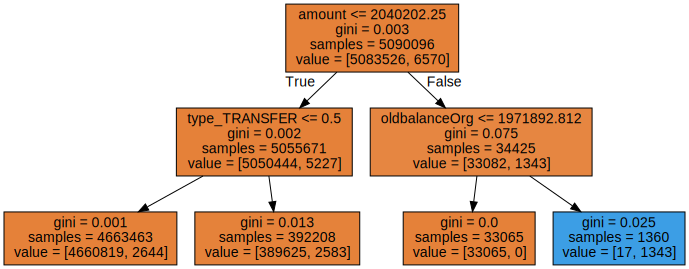

In [ ]:
arbol = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 2)
arbol.fit(X_train, y_train)
dot_data = tree.export_graphviz(arbol, out_file = None, 
                                feature_names = X_train.columns,  
                                filled = True)
graphviz.Source(dot_data, format = "png") 

In [ ]:
print("Profundidad (depth) = ",arbol.get_depth())
print("Nodos terminales    = ",arbol.get_n_leaves())

Profundidad (depth) =  2
Nodos terminales    =  4


El árbol con parámetros de profundidad 2 y criterio 'gini', tiene 4 nodos terminales.

#### Resultados
Se prueba el árbol

In [ ]:
y_pred_train=arbol.predict(X_train)
y_pred_test=arbol.predict(X_test)
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train, digits=5))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test, digits=5))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0    0.99897   1.00000   0.99948   5083526
           1    0.98750   0.20441   0.33871      6570

    accuracy                        0.99897   5090096
   macro avg    0.99324   0.60221   0.66910   5090096
weighted avg    0.99896   0.99897   0.99863   5090096

En los datos de prueba 
               precision    recall  f1-score   support

           0    0.99896   1.00000   0.99948   1270881
           1    0.99377   0.19416   0.32485      1643

    accuracy                        0.99896   1272524
   macro avg    0.99636   0.59708   0.66216   1272524
weighted avg    0.99895   0.99896   0.99861   1272524



* La probabilidad de que el modelo detecte un fraude es del 0,194, es decir que la certeza del modelo es del 19,4%.
* Si el modelo detecta un fraude, la probabilidad de que sea un fraude es del 98%.
* Dado que las distancias entre los datos de entrenamiento y los datos de prueba es mínima (lejos del 10%) se puede concluir que el modelo no está sobreajustado.

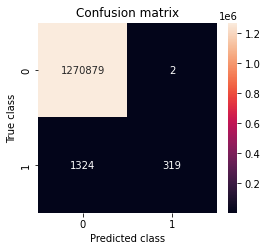

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4, 3.5))
sns.heatmap(conf_matrix, xticklabels='01', yticklabels='01', annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Los resultados de la matriz de confusión muestran que 
* 1'270.879 fueron pronosticados como no fraude y efectivamente eran no fraude
* 1324 el modelo los clasificó como no fraude pero si lo eran
* 2 el modelo dijo que eran fraude pero no lo eran
* 319 eran fraudes y pronosticados como tal.
* La probabilidad de que sea fraude es (1.324+319)/(1.324+319+1'270.879+2) = 1.643/1'272.524 = 0,00129 = 1.290/1'000.000
* La probabilidad de detectar un fraude dado que es fraude es 319/1.643 = 0,194 = 194/1.000
* (1,290 * 194) / (1.000 * 1,290) = 250.26/1290 de cada 1290 fraudes, el modelo deja pasar 1.039 de 1 millón de transacciones, lo cual es muy malo.
* La probabilidad de que no sea fraude y las pronostiqué como no fraude es 1'270.879/1'272.203 = 0,99895 es decir que de cada millón de transacciones el modelo no previene (se equivoca) 1.040 estafas.

A continuación, se aplica el modelo de regresión logística al conjunto de datos.

### Regresión Logística

En la regresión logística se clasifican problemas con dos posibles estados “SI/NO”: binario o un número finito de “etiquetas” o “clases”. 
<br> Para el conjunto de datos la variable objetivo 'isFraud' es binaria, es decir que las transacciones se clasifican en 0 y 1, no es fraude y fraudulenta respectivamente.

In [ ]:
df = pd.read_csv(ruta, sep=",")
del(df['nameOrig'])
del(df['nameDest'])
del(df['step'])
dfdummy=pd.get_dummies(df["type"], prefix = "type")
df = pd.concat([df, dfdummy], axis = 1)
del(df['type'])
df.head(n = 5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


In [ ]:
print(df.shape)
print(pd.value_counts(df['isFraud'], sort = True))

(6362620, 12)
0    6354407
1       8213
Name: isFraud, dtype: int64


In [ ]:
df.groupby("isFraud").size()/df.shape[0]

isFraud
0    0.998709
1    0.001291
dtype: float64

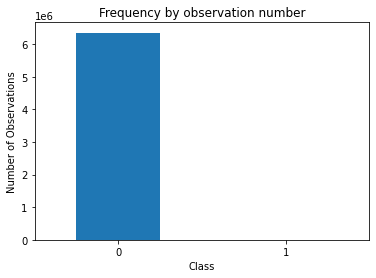

In [ ]:
count_classes = pd.value_counts(df['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), '01')
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

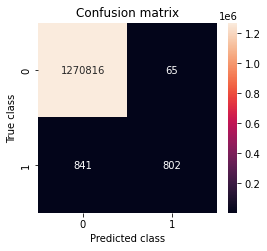

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.93      0.49      0.64      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.74      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
y = df['isFraud']
X = df.drop('isFraud', axis=1)
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,stratify=y)
 
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)
 
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 3.5))
    sns.heatmap(conf_matrix, xticklabels='01', yticklabels='01', annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [ ]:
y_pred_train=arbol.predict(X_train)
y_pred_test=arbol.predict(X_test)
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train, digits=5))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test, digits=5))

#### Resultados FALTA ANDRÉS :D

# Comparación de resultados

A continuación, se presenta el resumen de los resultados obtenidos de los 2 modelos aplicados a la base de datos.

&rarr; **Resultados**


| No. | Modelo | Precisión | Recall | f1-score | Observaciones |
| - | ----- | --- | ---|  ----- | --- |
| 1| Árbol de clasificación | | | | No se encuentra sobreajustado |
| 2 | Regresión Logística |  | | |  |

Por lo cual, se concluye que

# Referencias

* Base de datos [paysim1](https://www.kaggle.com/datasets/ealaxi/paysim1)
* Datos desbalanceados [Regresión Logística](https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/)